In [59]:
import pandas as pd
import numpy as np
import nltk 
%matplotlib inline
import matplotlib.pyplot as plt
import string
from nltk.classify import NaiveBayesClassifier

In [37]:
table=pd.read_csv('C:\\Users\Tulajdonos\Desktop\project_data.txt')
del(table['Clothing ID'])
positive_table=table[table['Rating']>=4]
positive_table.head()
negative_table=table[table['Rating']<4]
negative_table.head()

,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
5,5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
10,10,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
14,14,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
16,16,34,"You need to be at least average height, or taller",Material and color is nice. the leg opening i...,3,1,2,General,Bottoms,Pants\t\t\t\t\t\t\t\t\t\t


In [64]:
table.head(100)

,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates\t\t\t\t\t\t\t\t\t\t
1,1,34,NaN,"[Love, this, dress, !, it, 's, sooo, pretty, ....",5,1,4,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
3,3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants\t\t\t\t\t\t\t\t\t\t
4,4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses\t\t\t\t\t\t\t\t\t\t
5,5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
6,6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits\t\t\t\t\t\t\t\t\t\t
7,7,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits\t\t\t\t\t\t\t\t\t\t
8,8,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
9,9,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t


(array([  89.,    0.,  191.,    0.,    0.,  336.,    0.,  578.,    0.,
        1405.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

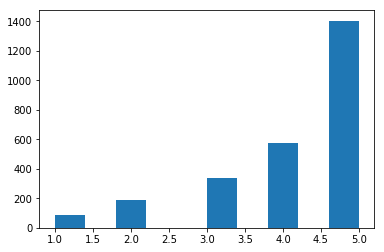

In [39]:
%matplotlib inline
plt.hist(table['Rating'])

In [40]:
table['Age'].describe()

count    2599.000000
mean       43.533282
std        12.348152
min        19.000000
25%        35.000000
50%        41.000000
75%        52.000000
max        93.000000
Name: Age, dtype: float64

In [52]:
# creating age categories
table['Age<30']=table['Age']<30
table['30<Age<40']=(table['Age']>=30) & (table['Age']<40).astype('int')
table['40<Age<50']=(table['Age']>=40) & (table['Age']<50).astype('int')
table['50<Age']=table['Age']>=50


In [68]:
table['Review Text'].dropna()
table.head(-10)

,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates\t\t\t\t\t\t\t\t\t\t
1,1,34,NaN,"[Love, this, dress, !, it, 's, sooo, pretty, ....",5,1,4,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
3,3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants\t\t\t\t\t\t\t\t\t\t
4,4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses\t\t\t\t\t\t\t\t\t\t
5,5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
6,6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits\t\t\t\t\t\t\t\t\t\t
7,7,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits\t\t\t\t\t\t\t\t\t\t
8,8,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t
9,9,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses\t\t\t\t\t\t\t\t\t\t


In [58]:
average_rating1 = table[['Age<30','Rating']].groupby('Age<30').mean()
average_rating2 = table[['30<Age<40','Rating']].groupby('30<Age<40').mean()
average_rating3 = table[['40<Age<50','Rating']].groupby('40<Age<50').mean()
average_rating4 = table[['50<Age','Rating']].groupby('50<Age').mean()

In [59]:
average_rating1.head()

,Rating
Age<30,
False,4.158813
True,4.182410


In [60]:
average_rating2.head()

,Rating
30<Age<40,
False,4.178838
True,4.126744


In [61]:
average_rating3.head()

,Rating
40<Age<50,
False,4.192328
True,4.073134


In [62]:
average_rating4.head()

,Rating
50<Age,
False,4.116494
True,4.270341


In [66]:
d={'Average rating': pd.Series([4.182, 4.127, 4.073, 4.270], index=['Age<30','30<Age<40','40<Age<50','50<Age'])}
df=pd.DataFrame(d)
print(df)

           Average rating
Age<30              4.182
30<Age<40           4.127
40<Age<50           4.073
50<Age              4.270


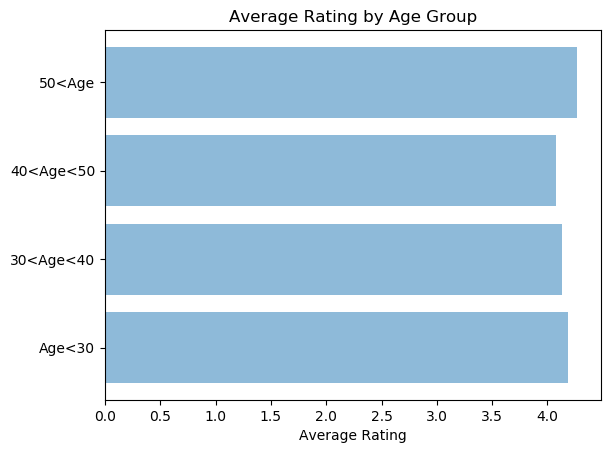

In [68]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Age<30','30<Age<40','40<Age<50','50<Age')
y_pos = np.arange(len(objects))
performance = [4.182,4.127,4.073,4.270]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average Rating')
plt.title('Average Rating by Age Group')
 
plt.show()

In [6]:
table['Review Text'].iloc[1].split()

['Love',
 'this',
 'dress!',
 "it's",
 'sooo',
 'pretty.',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store,',
 'and',
 "i'm",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 "it's",
 'petite.',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5\'8".',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee.',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite.']

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tulajdonos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
table['Review Text'].iloc[1]=nltk.word_tokenize(table['Review Text'].iloc[1])

C:\Users\Tulajdonos\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
table['Review Text'].iloc[1].split()

['Love',
 'this',
 'dress!',
 "it's",
 'sooo',
 'pretty.',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store,',
 'and',
 "i'm",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 "it's",
 'petite.',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5\'8".',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee.',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite.']

In [39]:
#defining functions seperately
a=[];
def build_positive_bag_of_words_features(words):
    a.append(words)
c=[]
def build_negative_bag_of_words_features(words):
    c.append(words)


In [73]:
build_bag_of_words_features(table['Review Text'].iloc[2].split())
print(a)
b = [j for i in a for j in i]
print(b)

[['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable'], ['Love', 'this', 'dress!', "it's", 'sooo', 'pretty.', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store,', 'and', "i'm", 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', "it's", 'petite.', 'i', 'bought', 'a', 'petite', 'and', 'am', '5\'8".', 'i', 'love', 'the', 'length', 'on', 'me-', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee.', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite.'], ['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me.', 'i', 'initially', 'ordered', 'the', 'petite', 'small', '(my', 'usual', 'size)', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small.', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up!', 'i', 'reordered', 'it', 'in', 'petite', 'medium,', 'which', 'was', 'just', 'ok.', '

In [4]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tulajdonos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [5]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

In [27]:
table.shape

(2599, 10)

In [10]:
a = []
for j in range (0,91):
    build_positive_bag_of_words_features(table['Review Text'].iloc[j].split())
    

In [11]:
print(a)

[['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable'], ['Love', 'this', 'dress!', "it's", 'sooo', 'pretty.', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store,', 'and', "i'm", 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', "it's", 'petite.', 'i', 'bought', 'a', 'petite', 'and', 'am', '5\'8".', 'i', 'love', 'the', 'length', 'on', 'me-', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee.', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite.'], ['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me.', 'i', 'initially', 'ordered', 'the', 'petite', 'small', '(my', 'usual', 'size)', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small.', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up!', 'i', 'reordered', 'it', 'in', 'petite', 'medium,', 'which', 'was', 'just', 'ok.', '

In [53]:
type(a)

list

In [13]:
b = [j for i in a for j in i if not j in useless_words]
print(b)
type()

['Absolutely', 'wonderful', 'silky', 'sexy', 'comfortable', 'Love', 'dress!', 'sooo', 'pretty.', 'happened', 'find', 'store,', "i'm", 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', 'petite.', 'bought', 'petite', '5\'8".', 'love', 'length', 'me-', 'hits', 'little', 'knee.', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite.', 'I', 'high', 'hopes', 'dress', 'really', 'wanted', 'work', 'me.', 'initially', 'ordered', 'petite', 'small', '(my', 'usual', 'size)', 'found', 'outrageously', 'small.', 'small', 'fact', 'could', 'zip', 'up!', 'reordered', 'petite', 'medium,', 'ok.', 'overall,', 'top', 'half', 'comfortable', 'fit', 'nicely,', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', '(net)', 'layers.', 'imo,', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', 'c', 'I', 'love,', 'love,', 'love', 'jumpsuit.', 'fun,', 'flirty,', 'fabulous!', 'every', 'time', 'wear', 'it,', 'get', 'nothing', 'great', 'compliments!', 'This', '

TypeError: type() takes 1 or 3 arguments

In [30]:
from collections import Counter
word_counter = Counter(b)

In [91]:
word_counter.most_common()[:10]

[('I', 35),
 ('would', 29),
 ('dress', 26),
 ('love', 25),
 ('top', 24),
 ('fit', 24),
 ('wear', 24),
 ('little', 23),
 ('look', 22),
 ('small', 21)]

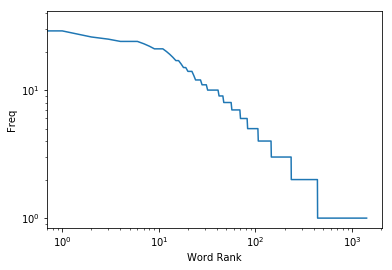

In [77]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

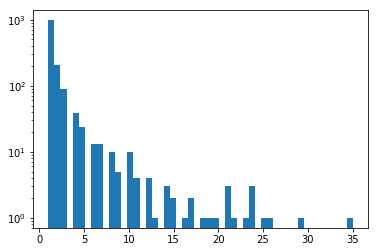

In [92]:
plt.hist(sorted_word_counts, bins=50, log=True);

In [54]:
positive_table.shape

(1983, 10)

In [55]:
negative_table.shape

(616, 10)

In [27]:
a = []
for j in range (0,71):
    build_bag_of_words_features(positive_table['Review Text'].iloc[j].split())
print(a)

[['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable'], ['Love', 'this', 'dress!', "it's", 'sooo', 'pretty.', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store,', 'and', "i'm", 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', "it's", 'petite.', 'i', 'bought', 'a', 'petite', 'and', 'am', '5\'8".', 'i', 'love', 'the', 'length', 'on', 'me-', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee.', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite.'], ['I', 'love,', 'love,', 'love', 'this', 'jumpsuit.', "it's", 'fun,', 'flirty,', 'and', 'fabulous!', 'every', 'time', 'i', 'wear', 'it,', 'i', 'get', 'nothing', 'but', 'great', 'compliments!'], ['This', 'shirt', 'is', 'very', 'flattering', 'to', 'all', 'due', 'to', 'the', 'adjustable', 'front', 'tie.', 'it', 'is', 'the', 'perfect', 'length', 'to', 'wear', 'with', 'leggings', 'and', 'it', 'is', 'sleeveless', 'so', 'it', 'pairs', 

In [28]:
b = [j for i in a for j in i if not j in useless_words]
print(b)

['Absolutely', 'wonderful', 'silky', 'sexy', 'comfortable', 'Love', 'dress!', 'sooo', 'pretty.', 'happened', 'find', 'store,', "i'm", 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', 'petite.', 'bought', 'petite', '5\'8".', 'love', 'length', 'me-', 'hits', 'little', 'knee.', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite.', 'I', 'love,', 'love,', 'love', 'jumpsuit.', 'fun,', 'flirty,', 'fabulous!', 'every', 'time', 'wear', 'it,', 'get', 'nothing', 'great', 'compliments!', 'This', 'shirt', 'flattering', 'due', 'adjustable', 'front', 'tie.', 'perfect', 'length', 'wear', 'leggings', 'sleeveless', 'pairs', 'well', 'cardigan.', 'love', 'shirt!!!', 'I', 'aded', 'basket', 'hte', 'last', 'mintue', 'see', 'would', 'look', 'like', 'person.', '(store', 'pick', 'up).', 'went', 'teh', 'darkler', 'color', 'pale', ':-)', 'hte', 'color', 'really', 'gorgeous,', 'turns', 'mathced', 'everythiing', 'trying', 'prefectly.', 'little', 'baggy', 'hte', 'xs', 'hte', 'msallet', 'siz

In [32]:
positive_word_counter = Counter(b)
positive_word_counter.most_common(10)

[('I', 26),
 ('would', 21),
 ('little', 20),
 ('top', 19),
 ('love', 18),
 ('wear', 18),
 ('dress', 18),
 ('fabric', 18),
 ('look', 16),
 ('color', 16)]

In [51]:
c = []
for j in range (0,39):
    build_negative_bag_of_words_features(negative_table['Review Text'].iloc[j].split())
print(c)

[['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me.', 'i', 'initially', 'ordered', 'the', 'petite', 'small', '(my', 'usual', 'size)', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small.', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up!', 'i', 'reordered', 'it', 'in', 'petite', 'medium,', 'which', 'was', 'just', 'ok.', 'overall,', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely,', 'but', 'the', 'bottom', 'half', 'had', 'a', 'very', 'tight', 'under', 'layer', 'and', 'several', 'somewhat', 'cheap', '(net)', 'over', 'layers.', 'imo,', 'a', 'major', 'design', 'flaw', 'was', 'the', 'net', 'over', 'layer', 'sewn', 'directly', 'into', 'the', 'zipper', '-', 'it', 'c'], ['I', 'love', 'tracy', 'reese', 'dresses,', 'but', 'this', 'one', 'is', 'not', 'for', 'the', 'very', 'petite.', 'i', 'am', 'just', 'under', '5', 'feet', 'tall', 'and', 'usually', 'wear', 'a', '0p', 'in'

In [57]:
d = [j for i in c for j in i if not j in useless_words]
print(d)

['I', 'high', 'hopes', 'dress', 'really', 'wanted', 'work', 'me.', 'initially', 'ordered', 'petite', 'small', '(my', 'usual', 'size)', 'found', 'outrageously', 'small.', 'small', 'fact', 'could', 'zip', 'up!', 'reordered', 'petite', 'medium,', 'ok.', 'overall,', 'top', 'half', 'comfortable', 'fit', 'nicely,', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', '(net)', 'layers.', 'imo,', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', 'c', 'I', 'love', 'tracy', 'reese', 'dresses,', 'one', 'petite.', '5', 'feet', 'tall', 'usually', 'wear', '0p', 'brand.', 'dress', 'pretty', 'package', 'lot', 'dress.', 'skirt', 'long', 'full', 'overwhelmed', 'small', 'frame.', 'stranger', 'alterations,', 'shortening', 'narrowing', 'skirt', 'would', 'take', 'away', 'embellishment', 'garment.', 'love', 'color', 'idea', 'style', 'work', 'me.', 'returned', 'dress.', 'Dress', 'runs', 'small', 'esp', 'zipper', 'area', 'runs.', 'ordered', 'sp', 'typically', 'fits', 'tigh

In [58]:
negative_word_counter = Counter(d)
negative_word_counter.most_common(10)

[('fit', 15),
 ('would', 15),
 ('I', 14),
 ('top', 14),
 ('like', 13),
 ('dress', 12),
 ('wear', 11),
 ('look', 11),
 ('fabric', 10),
 ('me.', 9)]